In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics 
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [5]:
df=pd.read_csv(r'C:\Users\AK COMPUTER SOLNZ\Documents\personal development\Data science challenges\Fetal health\fetal_health.csv')

In [6]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


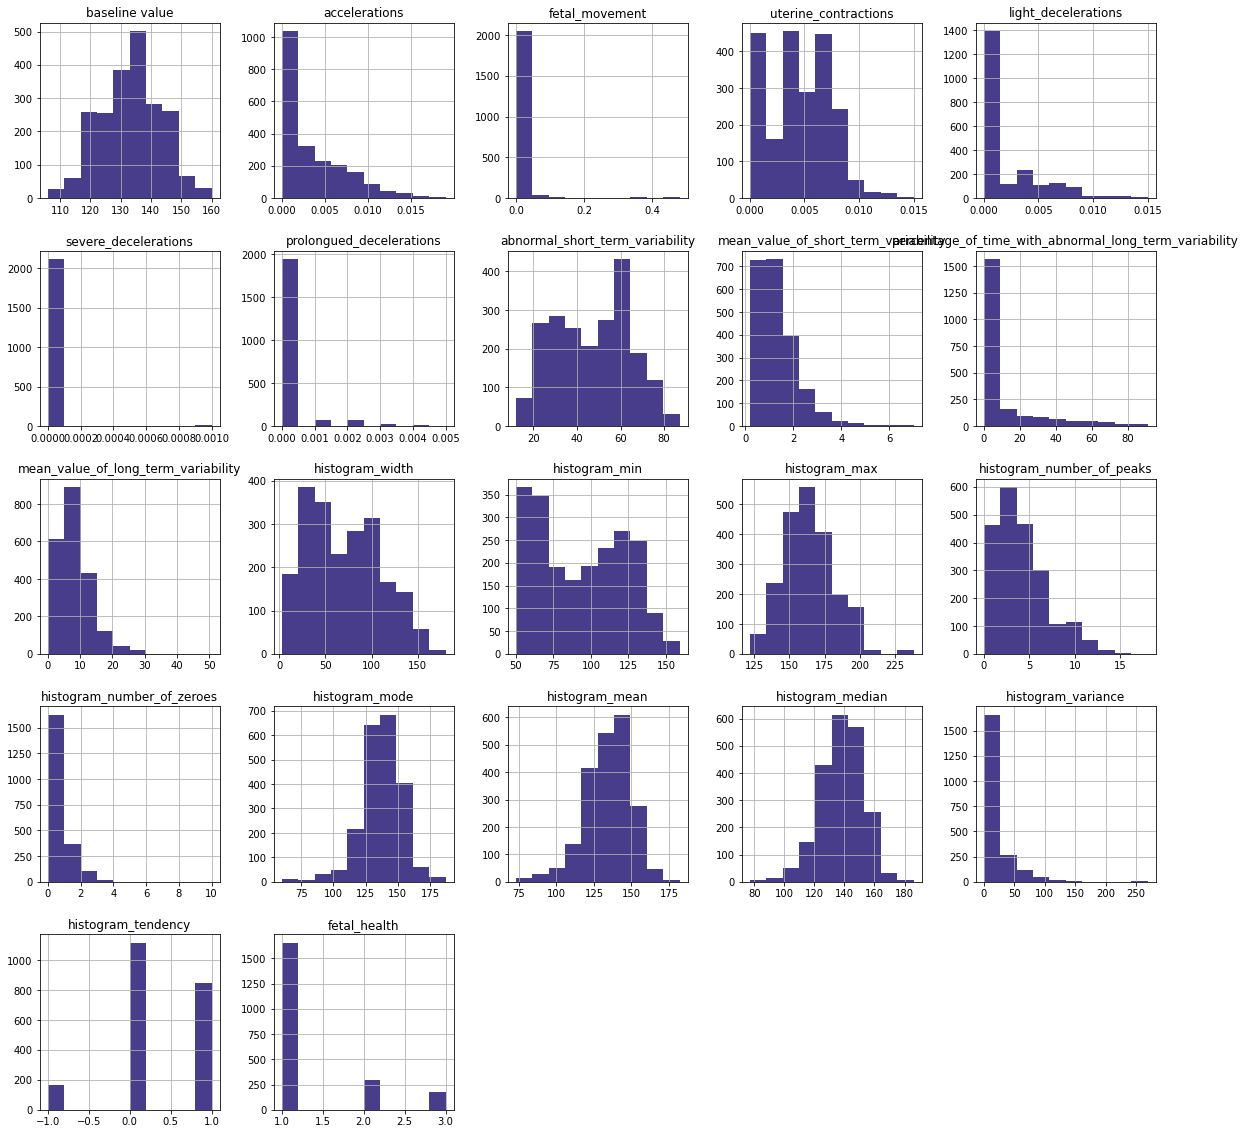

In [9]:
hist_plot=df.hist(figsize=(20,20), color="#483D8B")

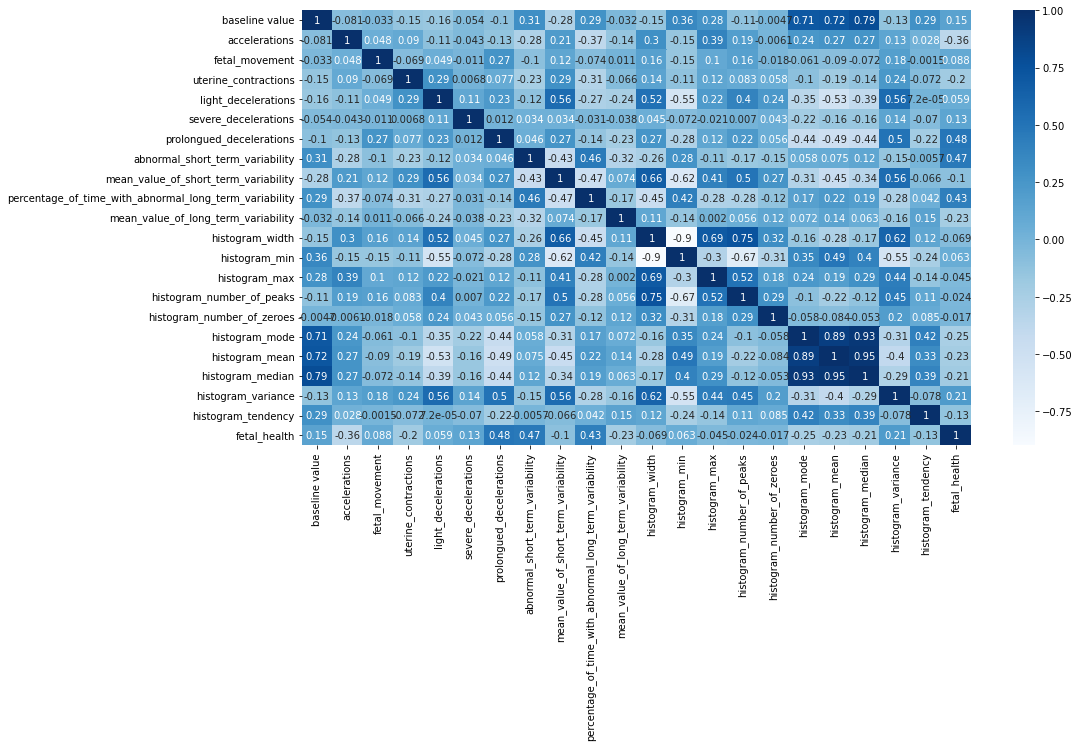

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot= True, cmap='Blues')
plt.show()

In [11]:
X=df.drop(['fetal_health'], axis=1)
y=df['fetal_health']

In [12]:
col_names=list(X.columns)
sc=StandardScaler()
X_ss=sc.fit_transform(X)
X_ss=pd.DataFrame(X_ss, columns=col_names)
X_ss.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,1.069490e-15,1.000235,-2.775197,-0.742373,-0.030884,0.680604,2.713428
accelerations,2126.0,-4.010589e-17,1.000235,-0.822388,-0.822388,-0.304881,0.730133,4.093929
fetal_movement,2126.0,-1.336863e-17,1.000235,-0.203210,-0.203210,-0.203210,-0.138908,10.106540
uterine_contractions,2126.0,-1.336863e-16,1.000235,-1.482465,-0.803434,-0.124404,0.894142,3.610264
light_decelerations,2126.0,-5.347452e-17,1.000235,-0.638438,-0.638438,-0.638438,0.375243,4.429965
severe_decelerations,2126.0,6.684315e-18,1.000235,-0.057476,-0.057476,-0.057476,-0.057476,17.398686
prolongued_decelerations,2126.0,1.336863e-17,1.000235,-0.268754,-0.268754,-0.268754,-0.268754,8.208570
abnormal_short_term_variability,2126.0,-7.352747e-17,1.000235,-2.035639,-0.872088,0.116930,0.815060,2.327675
mean_value_of_short_term_variability,2126.0,6.684315e-17,1.000235,-1.282833,-0.716603,-0.150373,0.415857,6.417893
percentage_of_time_with_abnormal_long_term_variability,2126.0,-5.347452e-17,1.000235,-0.535361,-0.535361,-0.535361,0.062707,4.412293


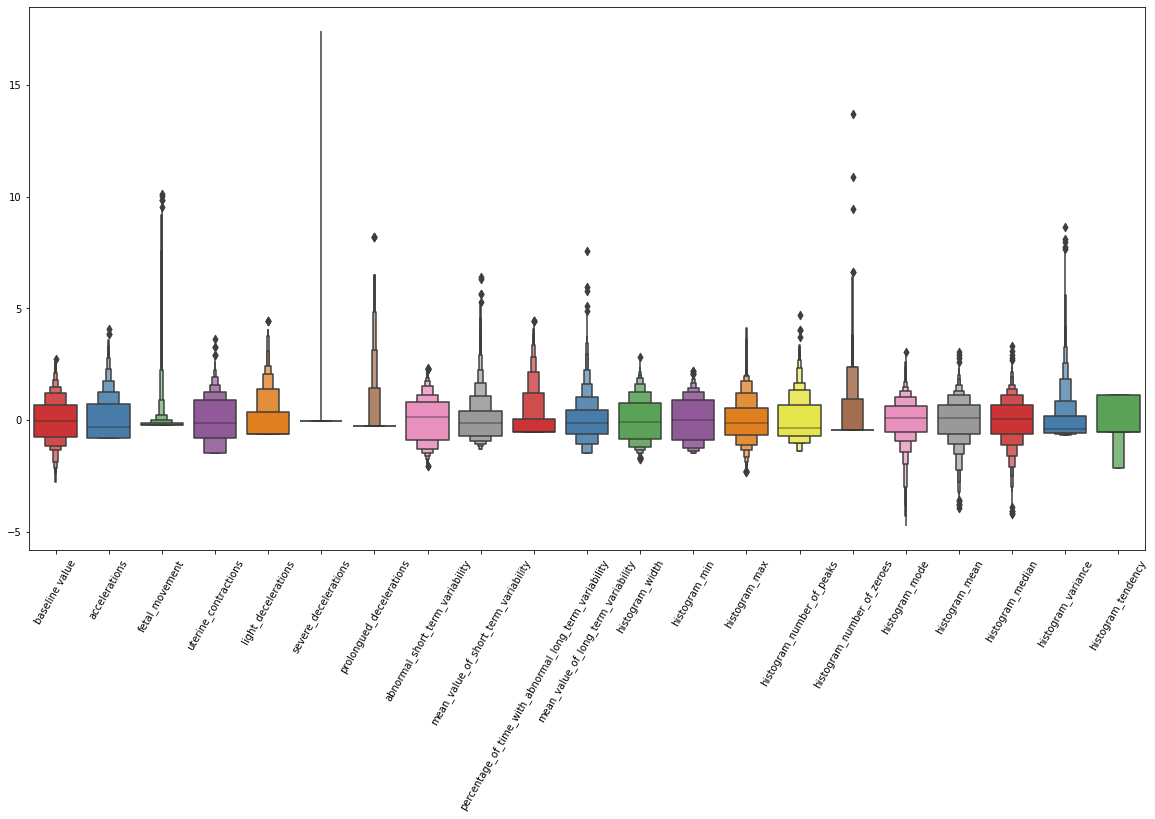

In [13]:
plt.figure(figsize=(20,10))
sns.boxenplot(data=X_ss, palette = "Set1")
plt.xticks(rotation=60)
plt.show()

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X_ss,y,test_size=0.2,random_state=25)

In [19]:
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression())])
pipeline_dt=Pipeline([('dt_classifier', DecisionTreeClassifier())])
pipeline_gbcl=Pipeline([('gbcl_classifier', GradientBoostingClassifier())])
pipeline_rf=Pipeline([('rf_classifier', RandomForestClassifier())])
pipeline_knn=Pipeline([('knn_classifier',KNeighborsClassifier())])
pipelines=[pipeline_lr,pipeline_dt,pipeline_gbcl,pipeline_rf,pipeline_knn]

In [26]:
pipe_dict = {0:'Logistic Regression',1: 'Decision Tree', 2:'Gradient Boosting', 3:'Random Forest',4:'KNN'} 

In [27]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [28]:
cv_results_accuracy=[]
for i,model in enumerate(pipelines):
    cv_score=cross_val_score(model, X_train, y_train, cv=12)
    cv_results_accuracy.append(cv_score)
    print("%s:%f"% (pipe_dict[i], cv_score.mean()))

C:\Users\AK COMPUTER SOLNZ\.conda\envs\ztdl\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\AK COMPUTER SOLNZ\.conda\envs\ztdl\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

Logistic Regression:0.897638
Decision Tree:0.924150
Gradient Boosting:0.944711
Random Forest:0.934726
KNN:0.894699


In [29]:
gbcl=GradientBoostingClassifier()

In [31]:
gbcl_model=gbcl.fit(X_train, y_train)
print(f"baseline score:{round(gbcl_model.score(X_test,y_test),2)}")
pred_gbcl=gbcl_model.predict(X_test)
pred_gbcl

baseline score:0.96


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 3., 2., 1., 1.,
       1., 1., 2., 1., 2., 1., 3., 2., 2., 1., 2., 1., 2., 3., 1., 1., 1.,
       1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 3., 1., 3., 1., 1., 1., 1., 1., 1., 2., 1., 1., 3.,
       3., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 3., 1., 2., 1.,
       1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 2., 1., 3., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 2., 1., 2., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 2., 1., 1., 3., 1.,
       1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 3.,
       3., 1., 1., 1., 1.

In [33]:
scores_gbcl=cross_val_score(gbcl,X_train,y_train,cv=8,n_jobs=2,scoring="accuracy")
print(f"CV scores:{scores_gbcl}")
print(f"mean scores:{round(scores_gbcl.mean(),2)}")

CV scores:[0.96244131 0.93896714 0.92488263 0.94366197 0.97641509 0.95754717
 0.93396226 0.95754717]
mean scores:0.95


In [35]:
parameters={"loss":["deviance"],
           "learning_rate":[0.05,0.075,0.1,0.25,0.5,0.75,1],
           "n_estimators":[200,350,500,700],
           "max_depth":[3,6,8]}

In [38]:
Gridsearch_gbcl=GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=parameters,
                             cv=2,
                             verbose=1,
                             n_jobs=3,
                             scoring="accuracy",
                             return_train_score=True)

In [39]:
Gridsearch_gbcl.fit(X_train, y_train)

Fitting 2 folds for each of 84 candidates, totalling 168 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=3,
             param_grid={'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5, 0.75,
                                           1],
                         'loss': ['deviance'], 'max_depth': [3, 6, 8],
                         'n_estimators': [200, 350, 500, 700]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [40]:
Gridsearch_gbcl.best_params_

{'learning_rate': 0.75,
 'loss': 'deviance',
 'max_depth': 6,
 'n_estimators': 200}

In [45]:
gbcl=GradientBoostingClassifier(criterion="friedman_mse",
                                 learning_rate=0.75,
                                 loss="deviance",max_depth=6,
                                 n_estimators=200,
                                 min_samples_leaf=0.3,
                                max_features="log2",
                                min_samples_split=0.5,random_state=25)


In [46]:
model=gbcl.fit(X_train,y_train)
prediction=model.predict(X_test)

In [47]:
train_score=gbcl.score(X_train, y_train)
train_score

0.9464705882352941

In [48]:
test_score=model.score(X_test,y_test)
test_score

0.8943661971830986

In [49]:
pred_gbcl=pipeline_gbcl.predict(X_test)
accuracy=accuracy_score(y_test, pred_gbcl)
accuracy

0.9530516431924883

In [50]:
print(classification_report(y_test,pred_gbcl))

              precision    recall  f1-score   support

         1.0       0.97      0.98      0.97       324
         2.0       0.91      0.82      0.86        60
         3.0       0.91      0.95      0.93        42

    accuracy                           0.95       426
   macro avg       0.93      0.92      0.92       426
weighted avg       0.95      0.95      0.95       426



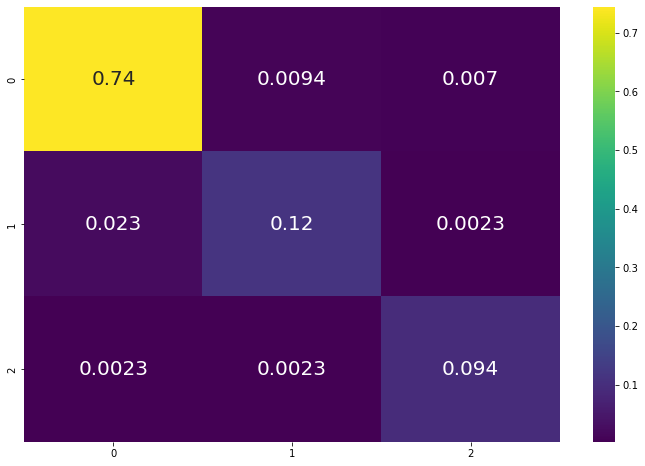

In [51]:
plt.subplots(figsize=(12,8))
cf_matrix=confusion_matrix(y_test, pred_gbcl)
sns.heatmap(cf_matrix/np.sum(cf_matrix),cmap='viridis',annot=True,annot_kws={'size':20})
plt.show()